In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import utils as ut

In [3]:
meta_file = "/data5/deepro/starrseq/data/meta_data/metadata.json"
peak_dir = "/data5/deepro/starrseq/main_library/3_peak_call/data"
bam_dir = "/data5/deepro/starrseq/main_library/1_dedup_align_filter/data/filtered"
input_name = "input"
lib_name = "control"

In [4]:
in_args = ut.create_args(meta_file, input_name)
lib_args = ut.create_args(meta_file, lib_name)

In [5]:
peak_file = ut.get_peak_file(peak_dir, lib_args.library_short)

In [7]:
in_bam_files = ut.get_rep_bam_file(
    bam_dir,
    in_args.library_short,
    in_args.library_prefix,
    in_args.library_reps
)

lib_bam_files = ut.get_rep_bam_file(
    bam_dir,
    lib_args.library_short,
    lib_args.library_prefix,
    lib_args.library_reps
)

In [8]:
in_cov_df = ut.get_replicate_wise_cov_df(peak_file, in_bam_files)
lib_cov_df = ut.get_replicate_wise_cov_df(peak_file, lib_bam_files)

In [9]:
fc_cov_df = lib_cov_df/in_cov_df

In [17]:
fc_cov_df.columns = [f"Replicate {i}" for i in range(1, fc_cov_df.shape[1] + 1)]

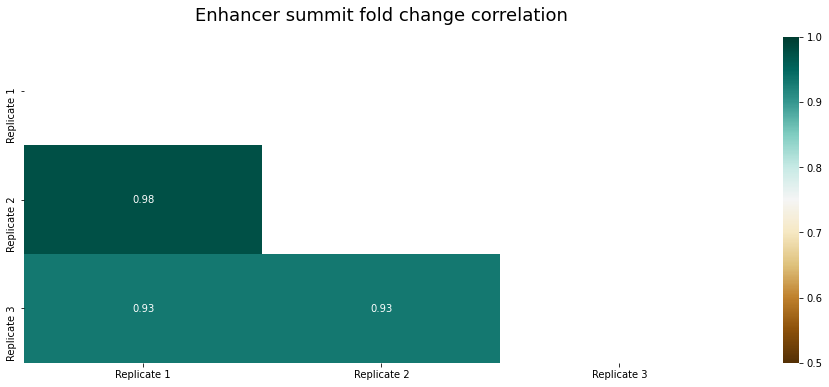

In [19]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(fc_cov_df.corr(), dtype=bool))

heatmap = sns.heatmap(fc_cov_df.corr(), mask=mask, vmin=0.5, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Enhancer summit fold change correlation', fontdict={'fontsize':18}, pad=16);